# STAT - HANDS-ON

## We import some python module

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special
from scipy.stats import chi2

# The Monty Hall problem

In [5]:
def BayesTheorem( likelihoods, priors):
    normalization = np.sum( likelihoods * priors)
    return likelihoods * priors / normalization

### Likelihood

Text(0.5, 1.0, ' Likelihoods ')

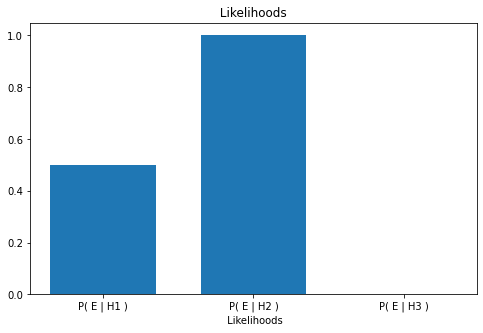

In [67]:
likelihoods = np.array( [ 0.5, 1, 0] )

counts = likelihoods
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["P( E | H1 )", "P( E | H2 )", "P( E | H3 )"])
ax.set_xlabel(" Likelihoods")
ax.set_title( " Likelihoods " )

### Priors

Text(0.5, 1.0, ' Prior Distribution ')

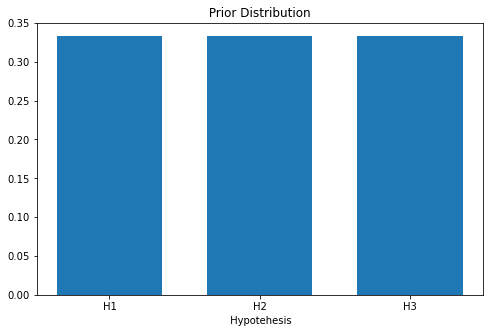

In [65]:
priors      = np.array( [1/3, 1/3, 1/3])

counts = priors
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["H1", "H2", "H3"])
ax.set_xlabel(" Hypotehesis")
ax.set_title( " Prior Distribution " )

### Posterior

Text(0.5, 1.0, ' Posterior Distribution ')

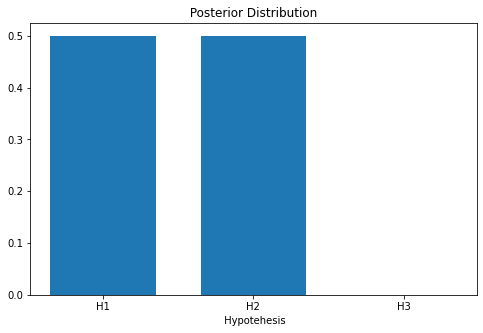

In [66]:
posterior   = BayesTheorem( likelihoods, priors) 

counts = posterior
bins = np.arange( len(counts) + 1)

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

centroids = (bins[1:] + bins[:-1]) / 2
counts_, bins_, _ = ax.hist(centroids, bins=len(counts),
                             weights=counts, range=(min(bins), max(bins)), rwidth=0.7)



ax.set_xticks( centroids)
ax.set_xticklabels( ["H1", "H2", "H3"])
ax.set_xlabel(" Hypotehesis")
ax.set_title( " Posterior Distribution " )

### What if the TV-Show host did not know where the car is?
### How the likelihoods change? What posterior do we get?

##  Covid result test

In [88]:
#prior
p_sick     = np.linspace(0.0,1,1000)
p_not_sick = 1 - p_sick

In [108]:
#sensitivity
Se  =  0.99
#specificity
Sp  =  0.99

In [109]:
p_sick_positive = 1/( 1 + (1-Sp)/Se * p_not_sick/p_sick)

/var/folders/cc/9yrg3qln5sq119c30p8bh2h00000gn/T/ipykernel_10763/931616044.py:1: RuntimeWarning: divide by zero encountered in true_divide
  p_sick_positive = 1/( 1 + (1-Sp)/Se * p_not_sick/p_sick)


Text(0.5, 0, ' $p( S  )$')

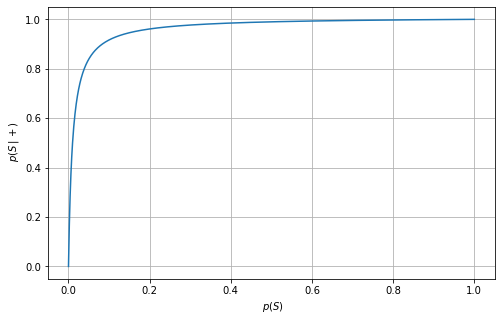

In [110]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)
ax.plot( p_sick, p_sick_positive)
ax.grid()
ax.set_ylabel(r" $p( S \,| \,  + )$")
ax.set_xlabel(r" $p( S  )$")

### Change the value of Sp. and Se. and see what happend

# "Sheep" example

In [138]:
# Percentage of black sheep accorinding to the model
p   = 0.01
# Percentage of black sheep accorinding to the alternative model
p2  = 0.02

# toale number of observed sheep
n  = 1000
# number of obseved black sheep
n_black = 20

Text(0, 0.5, 'PMF')

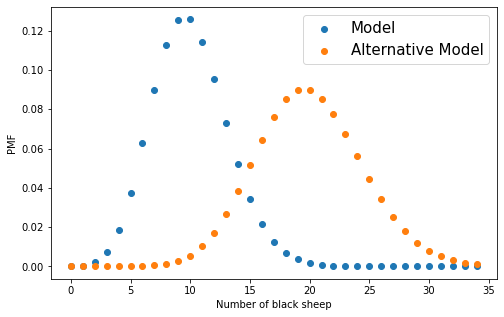

In [139]:

x = range(0,35)
y = [stats.binom.pmf( i, n,p) for i in x ]
y2 = [stats.binom.pmf( i, n,p2) for i in x ]

fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

ax.scatter(x,y, label = "Model")
ax.scatter(x,y2, label = "Alternative Model")
ax.legend(fontsize=15)
ax.set_xlabel("Number of black sheep")
ax.set_ylabel("PMF")

### Bayes's answer

In [121]:
likelihood  = stats.binom.pmf( n_black, n,p)
print( " p( D | M )     = ", likelihood)
likelihood2 = stats.binom.pmf( n_black, n,p2)
print( " p( D | bar_M ) = ", likelihood2)


 p( D | M )     =  0.0017918782400182188
 p( D | bar_M ) =  0.08973706929554043


In [122]:
BF = likelihood/likelihood2
BF

0.019968094056168024

### Frequentist's answer

In [130]:
pvalue = 1 - stats.binom.cdf( 20, n,p)
pvalue

0.0014964815477092053

In [131]:
pvalue = 1 - np.sum([stats.binom.pmf( i, n,p) for i in np.arange(0,21,1)])
pvalue

0.0014964815477102045

In [132]:
special.erfinv( 1 - pvalue ) * np.sqrt(2)

3.1753649631295957

# Powerful statistic

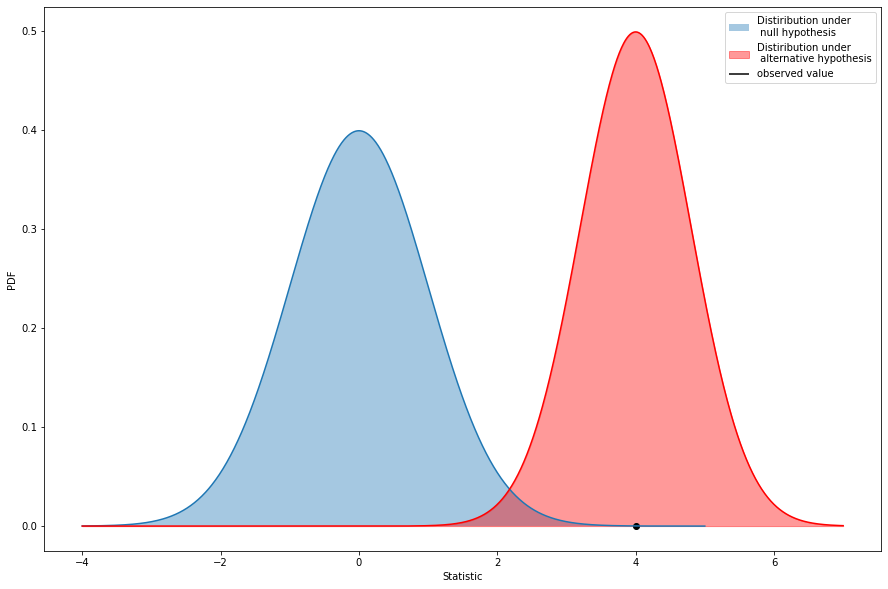

In [133]:
fig, ax = plt.subplots(figsize=(15,10),nrows=1, ncols=1)

x = np.linspace( -4, 5, 1000)
y = stats.norm.pdf( x, 0, 1)
plt.plot( x,y)
ax.fill_between(x,0,y,alpha=0.4, label="Distiribution under\n null hypothesis" )

x = np.linspace( -4, 7, 1000)
y = stats.norm.pdf( x, 4, 0.8)
plt.plot( x,y,  c='red')
ax.fill_between(x,0,y,alpha=0.4, color='red',label="Distiribution under\n alternative hypothesis" )

ax.set_xlabel("Statistic")
ax.set_ylabel("PDF")

xs = 4
ys = stats.norm.pdf( xs, 0, 1)
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

#ax.set_yscale("log")

ax.legend(loc='best')

# "Higg's discovery" toy model

In [134]:
def model(x,a):
    m = -6
    q = 720
    return m*x + q + a*1e3*stats.norm.pdf( x, 50, 8)

def single_likelihood( a, yobs, x):
    y = model(x,a)
    return stats.norm.pdf( yobs, y, 70)

def likelihood( a, yobs, x):
    lkl_list = [single_likelihood( a, yobs_i, x_i) for yobs_i, x_i in zip(yobs, x)]
    return np.prod(  lkl_list )

def simulate_obs(npoints, a, seed):
    rng     = np.random.default_rng(seed)
    xobs    = np.linspace(0, 100, npoints)
    yreal   = model(xobs,a)
    yobs    = [ rng.normal( iy, 70) for iy in yreal]
    return  xobs, yobs

Text(0, 0.5, 'y')

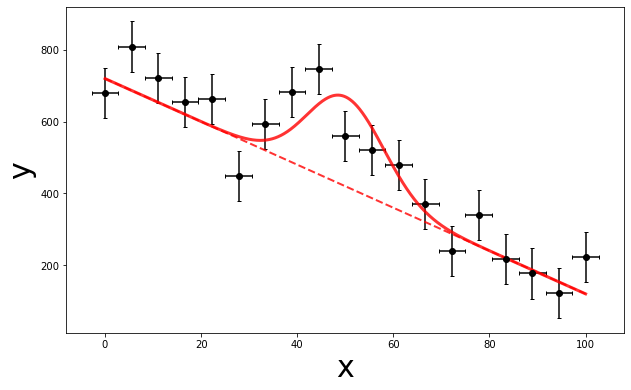

In [135]:
seed       = 76 #76 
npoints    = 19
true_a     = 5
xobs, yobs = simulate_obs(npoints, true_a, seed)

xerr = np.mean(xobs[1:]-xobs[:-1])/2

fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)


ax.errorbar(x=xobs, y=yobs, yerr=70 , xerr = xerr , c='black', capsize=2, fmt='o')

x_plot     = np.linspace(0, 100, 1000)
y_plot     = model(x_plot, true_a)
ax.plot(x_plot, y_plot, c='red', linewidth=3, alpha=.8)

y_plot     = model(x_plot, 0)
ax.plot(x_plot, y_plot, '--',linewidth=2,alpha=.8, c='red' )
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)

Text(0.5, 0, 'a')

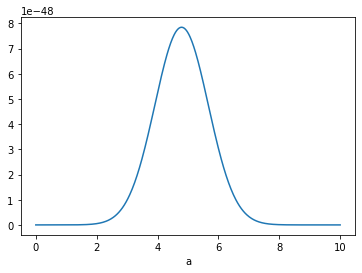

In [136]:
a_vals   = np.linspace(0,10, 500)
lkl_vals = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]

plt.plot( a_vals, lkl_vals)
plt.xlabel("a")
#plt.xscale("log")
#plt.yscale("log")

In [48]:
np.interp( 0, a_vals, lkl_vals/np.max(lkl_vals))

3.5198349428811384e-07

In [49]:
-2*np.log( np.interp( 0, a_vals, lkl_vals/np.max(lkl_vals)) )

29.719363107349384

In [28]:
np.sqrt( -2*np.log( np.interp( 0, a_vals, lkl_vals/np.max(lkl_vals)) ) )

5.451546854549576

In [9]:
%%time


a_vals     = np.linspace(-10,10, 1000)
    
TS_list_H0 = [ ]
TS_list_H1 = [ ]

def TS( a_vals, lkl_vals):
    guessed_a   = 0
    num         = np.interp( guessed_a, a_vals, lkl_vals )
    den         = np.max(    lkl_vals )
    return num/den

for i in range(200):
    
    
    a_hypothesis = 0
    xobs, yobs   = simulate_obs(npoints, a_hypothesis, i)
    lkl_vals     = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]
    TS_H0        = TS( a_vals, lkl_vals)
    
    a_hypothesis = 5
    xobs, yobs   = simulate_obs(npoints, a_hypothesis, i)
    lkl_vals     = [likelihood( a_i, yobs, xobs)  for a_i in a_vals]
    TS_H1        = TS( a_vals, lkl_vals)
    
    
    TS_list_H0.append( TS_H0 )
    TS_list_H1.append( TS_H1 )

CPU times: user 11min 43s, sys: 10.6 s, total: 11min 54s
Wall time: 11min 45s


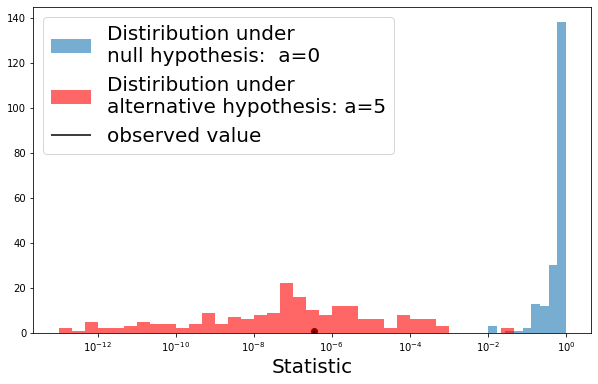

In [34]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)
bins = np.logspace(-2,0,10)
ax.hist( TS_list_H0, bins=bins, alpha=0.6 ,  label="Distiribution under\nnull hypothesis:  a=0" )

bins = np.logspace(-13,0,40)
ax.hist( TS_list_H1, bins=bins, alpha=0.6 ,color='red',label="Distiribution under\nalternative hypothesis: a=5" )
ax.set_xscale("log")
ax.set_xlabel("Statistic", fontsize=20)



xs = np.interp( 0, a_vals, lkl_vals/np.max(lkl_vals))
ys = 1
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

ax.legend(loc='best', fontsize=20)

In [35]:
logTS_h0 = -2*np.log(TS_list_H0)
logTS_h1 = -2*np.log(TS_list_H1)

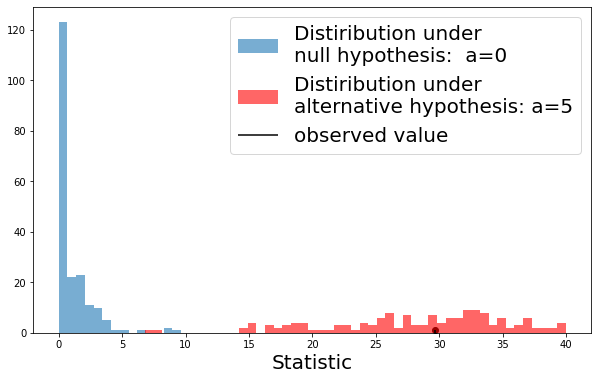

In [54]:
fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)
bins = np.linspace(0,20,30)
ax.hist( logTS_h0, bins=bins, alpha=0.6 ,  label="Distiribution under\nnull hypothesis:  a=0" )

bins = np.linspace(0,40,60)
ax.hist( logTS_h1, bins=bins, alpha=0.6 ,color='red',label="Distiribution under\nalternative hypothesis: a=5" )
#ax.set_xscale("log")
ax.set_xlabel("Statistic", fontsize=20)



xs = 29.7
ys = 1
ax.vlines(xs, 0, ys , color='black', label="observed value")
ax.scatter(xs,ys, color='black')

ax.legend(loc='best', fontsize=20)

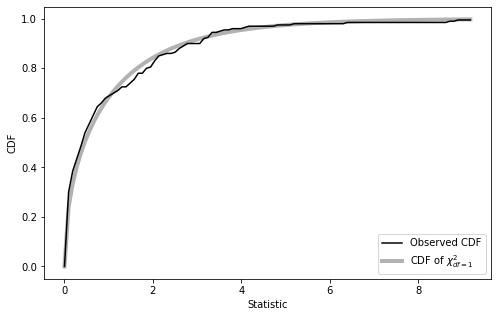

In [14]:
fig, ax = plt.subplots(figsize=(8,5),nrows=1, ncols=1)

all_TS = -2*np.log(TS_list_H0)

DOF = 1 # Number of free parameters that have been fitted

min_TS      = 0 #np.min(TS_list)
max_TS      = np.max(all_TS)
TS_bins     = np.linspace(min_TS ,max_TS,100)
TS_CDF      = np.array([np.sum( all_TS  < i ) for i in TS_bins])/len(all_TS)
ax.plot(TS_bins, TS_CDF , color='black', label="Observed CDF")


Chi2_CDF = chi2.cdf(TS_bins, df=DOF )
ax.plot(TS_bins,Chi2_CDF, color='black',alpha=0.3, linewidth=4, label=r"CDF of $\chi^2_{df = "+str(DOF) +"}$")
ax.set_ylabel("CDF")
ax.set_xlabel("Statistic")
ax.legend(loc="lower right")

In [32]:
1 - chi2.cdf(29.719363107349384, df=1)

4.9933561396819925e-08

In [20]:
special.erfinv( chi2.cdf(29.719363107349384, df=1) ) * np.sqrt(2)

5.45154685498925

In [33]:
special.erfinv( 1 - 5e-8 ) * np.sqrt(2)

5.451310437346855

In [55]:
np.sqrt(29.7)

5.449770637375485